In [5]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

In [6]:
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/" \
      "csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

df = pd.read_csv(url)
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [7]:
# Aggregate by country
df_country = df.drop(columns=["Lat", "Long", "Province/State"]).groupby("Country/Region").sum()

# Transpose to get latest date
df_country_latest = df_country.iloc[:, -1].reset_index()
df_country_latest.columns = ['Country', 'TotalConfirmed']

# Preview
df_country_latest.head()

,Country,TotalConfirmed
0,Afghanistan,209451
1,Albania,334457
2,Algeria,271496
3,Andorra,47890
4,Angola,105288


In [8]:
fig = px.choropleth(df_country_latest,
                    locations='Country',
                    locationmode='country names',
                    color='TotalConfirmed',
                    color_continuous_scale='Reds',
                    title='Global COVID-19 Confirmed Cases')
fig.show()

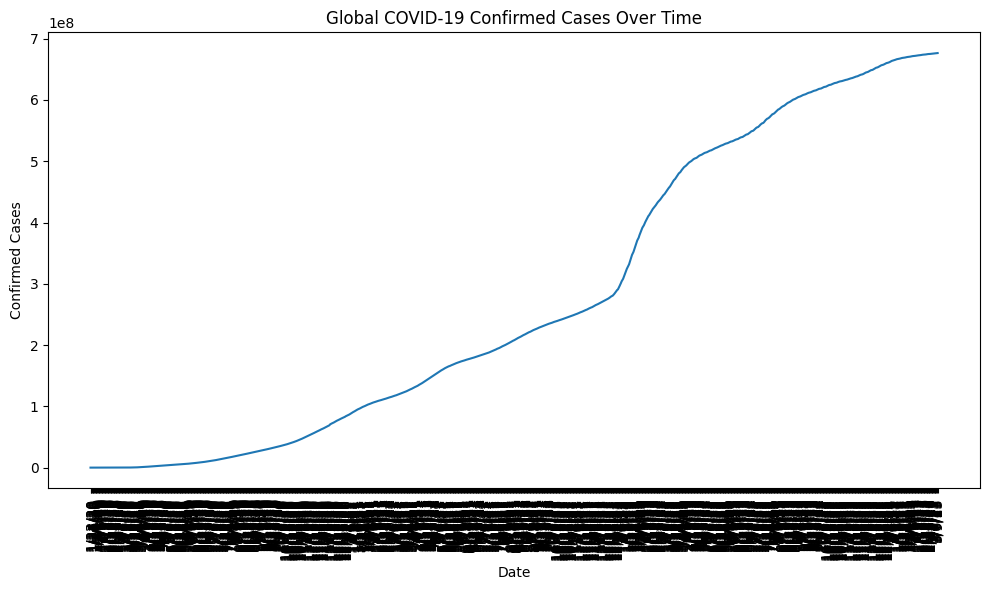

In [9]:
# Time series sum across countries
df_timeseries = df.drop(columns=["Lat", "Long", "Province/State"]).groupby("Country/Region").sum()
global_timeseries = df_timeseries.sum()

# Plot
plt.figure(figsize=(10,6))
plt.plot(global_timeseries.index, global_timeseries.values)
plt.xticks(rotation=90)
plt.title("Global COVID-19 Confirmed Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.tight_layout()
plt.show()
